## KNN--->K Nearest Neighbours
- K is no.of nearest neighbours
- tries to classify based on the similarity of the data points
- Recommended systems

Steps are
- Calculate the distance(Euclidean distance)
- Find the closest neighbours(choose the value of k)
- vote for labels

In [3]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")

In [4]:
data.head()

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [6]:
data.shape

(18, 3)

In [8]:
data['Size'].value_counts()

L    11
M     7
Name: Size, dtype: int64

In [9]:
data


,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [10]:
M=data[data['Size']=="M"]

In [11]:
M

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [12]:
L=data[data['Size']=="L"]

In [13]:
L

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


In [17]:
g=data.groupby("Size")
g.get_group('M')

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [19]:
g.get_group('L')

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


<function matplotlib.pyplot.show(close=None, block=None)>

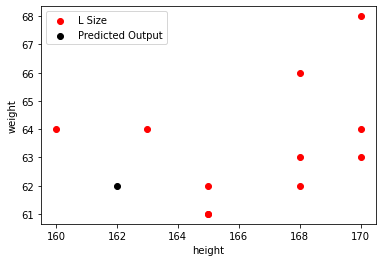

In [36]:
import matplotlib.pyplot as plt
plt.scatter(L["Height"],L["Weight"],c='r',label="L Size")
plt.scatter(162,62,c='k',label="Predicted Output")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show

In [20]:
x=data.iloc[:,:2]

In [21]:
x

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [28]:
y=data["target"]

In [29]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()

In [30]:
data["target"]=model.fit_transform(data["Size"])

In [31]:
data

,Height,Weight,Size,target
0,158,58,M,1
1,158,59,M,1
2,158,63,M,1
3,160,59,M,1
4,160,60,M,1
5,163,60,M,1
6,163,61,M,1
7,160,64,L,0
8,163,64,L,0
9,165,61,L,0


In [32]:
from sklearn.neighbors import KNeighborsClassifier
nb=KNeighborsClassifier(n_neighbors=3)
nb.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [35]:
nb.predict([[162,62]])

array([1])

In [42]:
y_pred=nb.predict(x)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
accuracy_score(y,y_pred)

1.0

In [40]:
confusion_matrix(y,y_pred)

array([[11,  0],
       [ 0,  7]], dtype=int64)

In [43]:
#precision=correct values/total predicted values
#recall=correct values/total actual values
precision_score(y,y_pred)

1.0

In [44]:
recall_score(y,y_pred)

1.0

In [82]:
# heart disease
df=pd.read_csv("C:/Users/India/Downloads/archive (1)/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [83]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [84]:
x=df.drop("target",axis=1)

In [85]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [86]:
y=df["target"]

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [131]:
from sklearn.neighbors import KNeighborsClassifier
nb=KNeighborsClassifier(n_neighbors=4)
nb.fit(x_train,y_train)
y_predict=nb.predict(x_test)

In [139]:
l=[]
for i in range(1,20):
    nb=KNeighborsClassifier(n_neighbors=i)
    nb.fit(x_train,y_train)
    y_predict1=nb.predict(x_test)
    l.append(accuracy_score(y_test,y_predict1)*100)

In [140]:
l

[59.34065934065934,
 61.53846153846154,
 68.13186813186813,
 70.32967032967034,
 67.03296703296702,
 65.93406593406593,
 64.83516483516483,
 67.03296703296702,
 68.13186813186813,
 69.23076923076923,
 65.93406593406593,
 68.13186813186813,
 64.83516483516483,
 64.83516483516483,
 67.03296703296702,
 68.13186813186813,
 65.93406593406593,
 64.83516483516483,
 67.03296703296702]

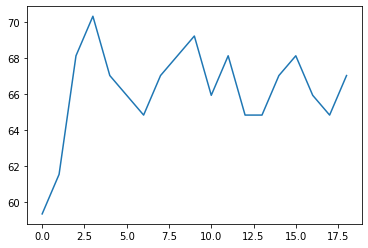

In [141]:
plt.plot(l)

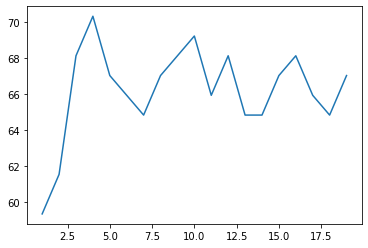

In [142]:
x1=range(1,20)
plt.plot(x1,l)

In [143]:
y_pred=nb.predict(x_test)
accuracy_score(y_test,y_predict)*100

70.32967032967034

In [144]:
confusion_matrix(y_test,y_predict)

array([[31,  9],
       [18, 33]], dtype=int64)

- Actual values:(64)
        - patients actually from heart disease-->31
        - patients actually don't have heart disease-->33

In [145]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [150]:
y_train

78     1
296    0
0      1
134    1
100    1
      ..
253    0
151    1
255    0
143    1
132    1
Name: target, Length: 212, dtype: int64

In [151]:
y_test

281    0
81     1
40     1
175    0
58     1
      ..
114    1
180    0
200    0
30     1
117    1
Name: target, Length: 91, dtype: int64

In [153]:
precision_score(y_test,y_pred)

0.6909090909090909

In [155]:
recall_score(y_test,y_pred)

0.7450980392156863